In [1]:
!wget 'https://raw.githubusercontent.com/karencfisher/dcgan/main/dcgan.py'

--2022-11-09 23:43:20--  https://raw.githubusercontent.com/karencfisher/dcgan/main/dcgan.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5912 (5.8K) [text/plain]
Saving to: ‘dcgan.py’

dcgan.py            100%[===================>]   5.77K  --.-KB/s    in 0s      

2022-11-09 23:43:21 (63.8 MB/s) - ‘dcgan.py’ saved [5912/5912]



In [3]:
#Needs matplotlib version 3.3.4
!pip install matplotlib==3.3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 5.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf

from dcgan import DCGAN

Load the fashion-mnist data set and preprocess images (scale and flatten)

In [2]:
model_path = None
dcgan = DCGAN(model_path=model_path, lr=4e-4)

In [3]:
# load MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = np.expand_dims(X_train, -1)

dcgan.preprocessor.fit(X_train)
X_train = dcgan.preprocessor.transform(X_train)

Look at a sample of the original images

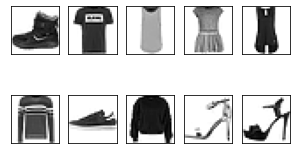

In [8]:
fig, ax = plt.subplots(2, 5, figsize=(5, 3))
fig.patch.set_facecolor('white')
for indx, img in enumerate(X_train[:10]):
    i, j = indx // 5, indx % 5
    img = dcgan.preprocessor.inverse(img)
    img = img.astype(int)
    ax[i, j].imshow(img, cmap=plt.cm.binary)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

Instantiate and train our DCGAN

Epoch 1: 100%|##########| 600/600 [05:39<00:00,  1.77it/s]


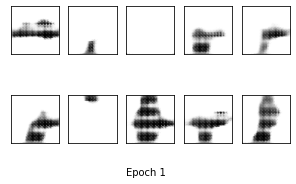

Epoch 2: 100%|##########| 600/600 [05:33<00:00,  1.80it/s]


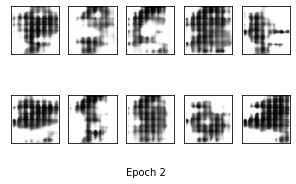

Epoch 3: 100%|##########| 600/600 [05:34<00:00,  1.79it/s]


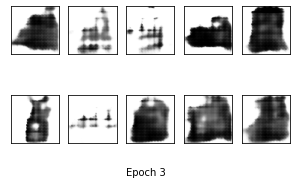

Epoch 4: 100%|##########| 600/600 [05:32<00:00,  1.80it/s]


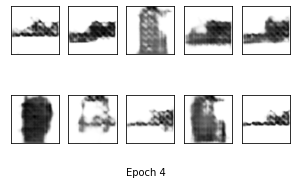

Epoch 5: 100%|##########| 600/600 [05:33<00:00,  1.80it/s]


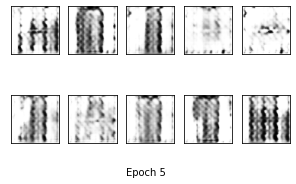

Epoch 6: 100%|##########| 600/600 [05:32<00:00,  1.81it/s]


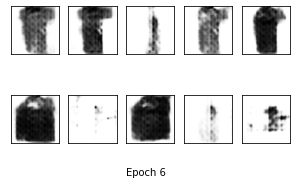

Epoch 7: 100%|##########| 600/600 [05:33<00:00,  1.80it/s]


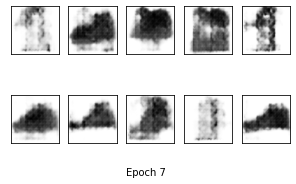

Epoch 8: 100%|##########| 600/600 [05:32<00:00,  1.80it/s]


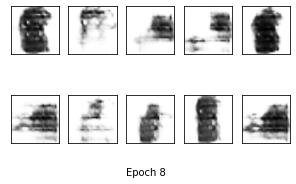

Epoch 9: 100%|##########| 600/600 [05:33<00:00,  1.80it/s]


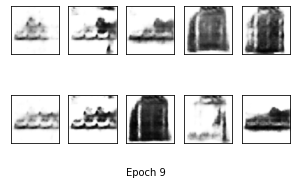

Epoch 10: 100%|##########| 600/600 [05:33<00:00,  1.80it/s]


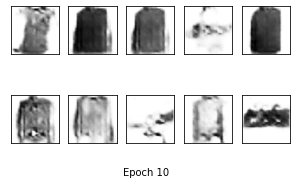

Epoch 11: 100%|##########| 600/600 [05:33<00:00,  1.80it/s]


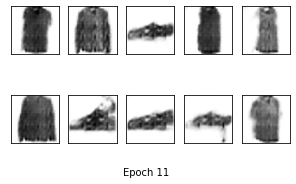

Epoch 12: 100%|##########| 600/600 [05:33<00:00,  1.80it/s]


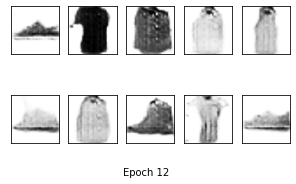

Epoch 13: 100%|##########| 600/600 [05:32<00:00,  1.81it/s]


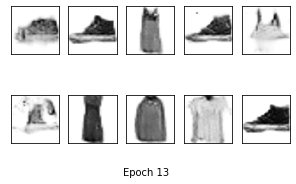

Epoch 14: 100%|##########| 600/600 [05:32<00:00,  1.81it/s]


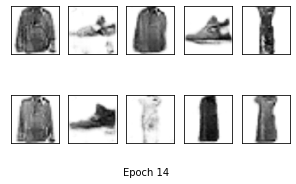

Epoch 15: 100%|##########| 600/600 [05:32<00:00,  1.81it/s]


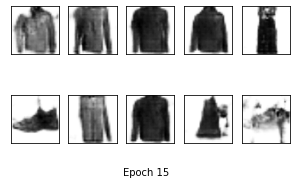

Epoch 16: 100%|##########| 600/600 [05:33<00:00,  1.80it/s]


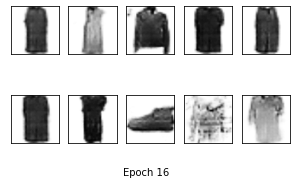

Epoch 17: 100%|##########| 600/600 [05:32<00:00,  1.80it/s]


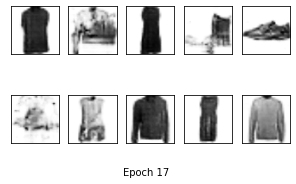

Epoch 18: 100%|##########| 600/600 [05:30<00:00,  1.81it/s]


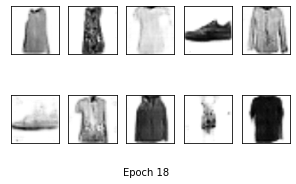

Epoch 19: 100%|##########| 600/600 [05:31<00:00,  1.81it/s]


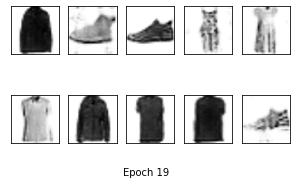

Epoch 20: 100%|##########| 600/600 [05:31<00:00,  1.81it/s]


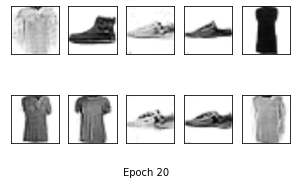

Epoch 21: 100%|##########| 600/600 [05:35<00:00,  1.79it/s]


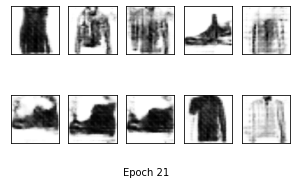

Epoch 22: 100%|##########| 600/600 [05:35<00:00,  1.79it/s]


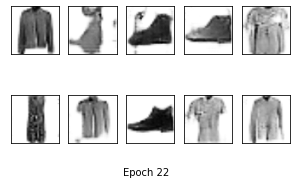

Epoch 23: 100%|##########| 600/600 [05:33<00:00,  1.80it/s]


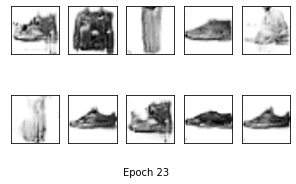

Epoch 24: 100%|##########| 600/600 [05:36<00:00,  1.78it/s]


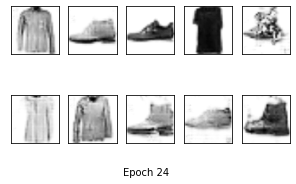

Epoch 25: 100%|##########| 600/600 [05:37<00:00,  1.78it/s]


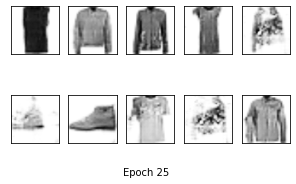

In [4]:
d_losses, g_losses = dcgan.train(X_train, 25, 100, verbose=1)

In [ ]:
dcgan.save_model('models')

Plot the losses during training. The generator and discriminator losses should converge.

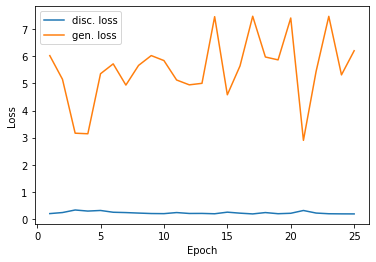

In [5]:
plt.plot(range(1, 26), d_losses, label='disc. loss')
plt.plot(range(1, 26), g_losses, label='gen. loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Softmax

clf = load_model('fashion_mnist_classifier.h5')

1/1 [==============================] - 0s 16ms/step


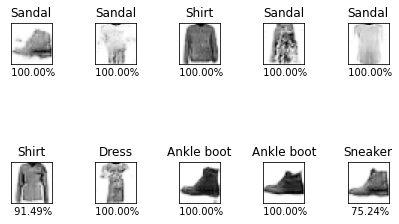

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# generate new images. since they are returned as 1-D vectors, we 
# will need to reshape them for the classifier (which is a CNN)
images = dcgan.generate(10, None, display=False)
#images = images.reshape(-1, 28, 28, 3)
# Add the channel dimension
#images = np.expand_dims(images, -1)

# Predict the labels by the classifier
images = tf.image.resize(images, (28, 28))
y_hat = clf.predict(images)
soft_max = Softmax()
probs = soft_max(y_hat)
labels = np.argmax(probs, axis=1)

# Display the results
fig, ax = plt.subplots(2, 5, figsize=(6, 4))
fig.patch.set_facecolor('white')
fig.tight_layout()
for indx in range(10):
    label = class_names[labels[indx]]
    prob = np.max(probs[indx])
    img = images[indx]
    
    i, j = indx // 5, indx % 5
    ax[i, j].imshow(img, cmap=plt.cm.binary)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])
    ax[i, j].set_xlabel(f'{prob * 100: .2f}%')
    ax[i,j].set_title(label)